#**Machine Learning - Desafío 8**
#Algoritmos de ensamble: Random Forest

##*24 de octubre de 2021*

##**Francisca Pinto**

###**Ejercicio 1**

* Se relizarán las tareas necesarias para realizar el desafIo: importación de librerías y del DataFrame correspondiente.

In [1]:
!pip install ipython-autotime
!pip install joblib

In [2]:
#tiempo de ejecución
%load_ext autotime

#dataframe y arrays
import pandas as pd
import numpy as np

#estadística
import scipy.stats as stats

#gráficos

import matplotlib.pyplot as plt
import seaborn as sns

#gama matplotlib para facilitar escritura de código
%matplotlib inline


#separación entrenamiento validación
from sklearn.model_selection import train_test_split, GridSearchCV

#pipeline
from sklearn.pipeline import Pipeline

#clasificadores
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#preprocesamiento
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer

#Árbol de decisión de regresión
from sklearn.tree import DecisionTreeRegressor

#Random Forest
from sklearn.ensemble import RandomForestRegressor

#joblib para importación de pipelines y modelos
import joblib

time: 986 ms (started: 2021-10-28 21:44:22 +00:00)


In [3]:
#AUX: montar archivos y carpetas desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.67 ms (started: 2021-10-28 21:44:23 +00:00)


In [4]:
sns.set(font_scale = 0.7) #escalar fuente para acomodar a gráfico
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (5,5) #escalar gráficos
plt.rcParams["figure.dpi"] = 150 #DPI gráficos (también modifica tamaño)

time: 2.92 ms (started: 2021-10-28 21:44:23 +00:00)


In [5]:
url = "/content/drive/MyDrive/ADL/3_Intro ML/Desafío 8 - Algoritmos de ensamble/Apoyo Desafío - Random Forest/ames_housing.csv"

dataframe1 = pd.read_csv(url)
dataframe1.drop(columns = "Unnamed: 0", inplace = True)

time: 1.33 s (started: 2021-10-28 21:44:23 +00:00)


###**Ejercicio 2**

Comentarios:

* Se aplica el método <code>.get_dummies()</code> al DataFrame con <code>drop_first = True</code>, tal como se realizó en el desafío anterior.
* Poateriormente, se replica el trabajo de crear un nuevo DataFrame con las variables con mayor preponderancia derivadas del desafío anterior.

> Nota: al importar el modelo con el método <code>.load</code> de la librería <code>Joblib</code> hubo problemas con la importación de los conjuntos <code>train</code> y <code>test</code> (el código generaba errores al no encontrar tal información), por lo que se decidió replicar el pre-procesamiento para continuar con el desafío.

In [6]:
dataframe2 = pd.get_dummies(data = dataframe1,
                            drop_first = True,
                            dtype = "int")

columns_names = ["Lot_Area", "Year_Built", "Year_Remod_Add", "Total_Bsmt_SF", "First_Flr_SF",
                 "Gr_Liv_Area", "Garage_Cars", "Garage_Area", "Sale_Price", "Longitude",
                 "Latitude"]

dataframe3 = dataframe2.loc[ : , columns_names]
X_train_jl, X_test_jl, y_train_jl, y_test_jl = train_test_split(dataframe3.drop(columns = "Sale_Price"),
                                                                dataframe3["Sale_Price"],
                                                                test_size = 0.33,
                                                                random_state = 3748)

time: 77.5 ms (started: 2021-10-28 21:44:25 +00:00)


Comentarios:

* Se importará el modelo generado en el desafío anterior con la librería <code>joblib</code> y el método <code>.dump()</code>.

In [7]:
model_jl = joblib.load("/content/drive/MyDrive/ADL/3_Intro ML/Desafío 7 - Árboles de regresión/Apoyo Desafío - Árboles de regresión/model_dectree_FP.sav")

time: 553 ms (started: 2021-10-28 21:44:25 +00:00)


Comentarios:

* Luego de cargar el modelo se crea el vector de predicciones.
* Para revisar todas las métricas, se crearán variables que almacenen <code>MSE</code>, <code>MAE</code> y <code>r2 Score</code>.

In [8]:
yhat_jl = model_jl.predict(X_test_jl)

time: 3.51 ms (started: 2021-10-28 21:44:25 +00:00)


In [9]:
model_jl_mse = mean_squared_error(y_test_jl, yhat_jl)
model_jl_mae = median_absolute_error(y_test_jl, yhat_jl)
model_jl_r2_score = r2_score(y_test_jl, yhat_jl)

time: 9.06 ms (started: 2021-10-28 21:44:25 +00:00)


In [10]:
print(f"Modelo Joblib, Error Cuadrático Medio: {model_jl_mse.round(4)}", f"\nModelo Joblib, Mediana del Error Absoluto: {model_jl_mae.round(4)}", f"\nModelo Joblib, Puntaje R2: {model_jl_r2_score.round(4)}")

Modelo Joblib, Error Cuadrático Medio: 1460168839.7175 
Modelo Joblib, Mediana del Error Absoluto: 18673.5824 
Modelo Joblib, Puntaje R2: 0.7816
time: 3.73 ms (started: 2021-10-28 21:44:25 +00:00)


In [11]:
np.sqrt(model_jl_mse)

38212.155653895585

time: 4.33 ms (started: 2021-10-28 21:44:25 +00:00)


###**Ejercicio 3**

Comentarios:

* Ahora se creará el primer modelo <code>Random Forest</code> sin modificar hiperparámetros, utilizando los mismos conjuntos del modelo anterior para comparar sus desempeños.

In [12]:
model_rf1 = RandomForestRegressor(oob_score = True,
                                 random_state = 3748).fit(X_train_jl, y_train_jl)

time: 1.34 s (started: 2021-10-28 21:44:25 +00:00)


In [13]:
yhat_rf1 = model_rf1.predict(X_test_jl)

time: 31.7 ms (started: 2021-10-28 21:44:27 +00:00)


In [14]:
model_rf1_mse = mean_squared_error(y_test_jl, yhat_rf1)
model_rf1_mae = median_absolute_error(y_test_jl, yhat_rf1)
model_rf1_r2_score = r2_score(y_test_jl, yhat_rf1)
model_rf1_oob_score = model_rf1.oob_score_

time: 5.06 ms (started: 2021-10-28 21:44:27 +00:00)


In [15]:
print(f"Modelo Random Forest (1), Error Cuadrático Medio: {model_rf1_mse.round(4)}",
      f"\nModelo Random Forest (1), Mediana del Error Absoluto: {model_rf1_mae.round(4)}",
      f"\nModelo Random Forest (1), Puntaje R2: {model_rf1_r2_score.round(4)}",
      f"\nModelo Random Forest (1), OOB Score: {model_rf1_oob_score.round(4)}")

Modelo Random Forest (1), Error Cuadrático Medio: 926166820.5496 
Modelo Random Forest (1), Mediana del Error Absoluto: 12178.95 
Modelo Random Forest (1), Puntaje R2: 0.8615 
Modelo Random Forest (1), OOB Score: 0.8456
time: 4.37 ms (started: 2021-10-28 21:44:27 +00:00)


In [16]:
np.sqrt(model_rf1_mse)

30432.989017669428

time: 4.28 ms (started: 2021-10-28 21:44:27 +00:00)


Comentarios:

* Disminuye MSE de en más de un 25%, por lo que el error de las predicciones del modelo disminuyó considerablemente. 
* Se volvió a evaluar la raíz de <code>MSE</code> para tener una noción de su magnitud, y se detectó que este disminuyó en un <code>20%</code>.
* Además de lo anterior disminuye <code>MAE</code> en un <code>35%</code>, lo cual es coherente con la mejora en el desempeño ya vista en <code>MSE</code>, ya que ha disminuido la magnitud del error de las predicciones del modelo, por lo que la mediana de este vector tenderá también a disminuir.
* <code>R2</code> aumentó casi 10 puntos, por lo que el modelo mejora su capacidad explicativa respecto a los valores del vector objetivo, pasando de un <code>78%</code> a un <code>86%</code>.
* En el caso del <code>OOB Score</code> este se analizará posteriormente con el modelo siguiente para poder compararlo, ya que actualmente no se tiene referencias con las cuales contrastar.
* En conclusión, existe una mejora importante del modelo modificando el algoritmo utilizado, aún sin modificar sus hiperparámetros.

##**Ejercicio 4**

* Se aplicará el modelo <code>GridSearchCV</code> para iterar con parte de los hiperparámetros de <code>Random Forest</code> para optimizar su desempeño en un modelo siguiente.
* Los hiperparámetros a evaluar con <code>max_features</code> y <code>n_estimators</code>.
* Se ajusta <code>verbose = 3</code> para revisar el desarrollo de la búsqueda en la grilla.


In [17]:
model_rf1_gridsearchcv = GridSearchCV(RandomForestRegressor(),
                                      {"max_features": [None, "log2", "sqrt"],
                                       "n_estimators" : range(20, 1000, 50),
                                       "oob_score" : [True],
                                       "random_state" : [3748]},
                                      n_jobs = -1,
                                      verbose = 3).fit(X_train_jl, y_train_jl)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.0min finished


time: 13min 5s (started: 2021-10-28 21:44:27 +00:00)


In [18]:
model_rf1_gridsearchcv.best_params_

{'max_features': 'log2',
 'n_estimators': 970,
 'oob_score': True,
 'random_state': 3748}

time: 5.3 ms (started: 2021-10-28 21:57:33 +00:00)


In [19]:
model_rf1_gridsearchcv.best_score_

0.8550013709943171

time: 3.96 ms (started: 2021-10-28 21:57:33 +00:00)


Comentarios:

* Ahora se graficarán los resultados de diferentes <code>max_features</code> y <code>n_estimators</code> para saber de qué forma mejora el comportamiento del modelo (medido en <code>OOB Score</code>) a medida que se modifican.
* Se sigue el método de la lectura de este contenido.

In [20]:
tmp_oob_none, tmp_oob_sqrt, tmp_oob_log2 = [], [], []
tmp_test_r2score_none, tmp_test_r2score_sqrt, tmp_test_r2score_log2 = [], [], []
n_estimators = range(20, 1000, 50)

#se itera con la cantidad de estimadores, sobre 3 árboles RandomForestRegressor modificando la forma de selección de atributos
for i in n_estimators:
  model_rf2_none = RandomForestRegressor(n_estimators = i,
                                   max_features = None,
                                   oob_score = True,
                                   random_state = 3748).fit(X_train_jl, y_train_jl)

  yhat_rf2_none = model_rf2_none.predict(X_test_jl)

  model_rf2_sqrt = RandomForestRegressor(n_estimators = i,
                                   max_features = "sqrt",
                                   oob_score = True,
                                   warm_start = True,
                                   random_state = 3748).fit(X_train_jl, y_train_jl)

  yhat_rf2_sqrt = model_rf2_sqrt.predict(X_test_jl)

  model_rf2_log2 = RandomForestRegressor(n_estimators = i,
                                   max_features = "log2",
                                   oob_score = True,
                                   warm_start = True,
                                   random_state = 3748).fit(X_train_jl, y_train_jl)

  yhat_rf2_log2 = model_rf2_log2.predict(X_test_jl)

  tmp_oob_none.append(model_rf2_none.oob_score_)
  tmp_oob_sqrt.append(model_rf2_sqrt.oob_score_)
  tmp_oob_log2.append(model_rf2_log2.oob_score_)

  tmp_test_r2score_none.append(r2_score(y_test_jl, yhat_rf2_none))
  tmp_test_r2score_sqrt.append(r2_score(y_test_jl, yhat_rf2_sqrt))
  tmp_test_r2score_log2.append(r2_score(y_test_jl, yhat_rf2_log2))

time: 4min 11s (started: 2021-10-28 21:57:33 +00:00)


<Figure size 1800x600 with 0 Axes>

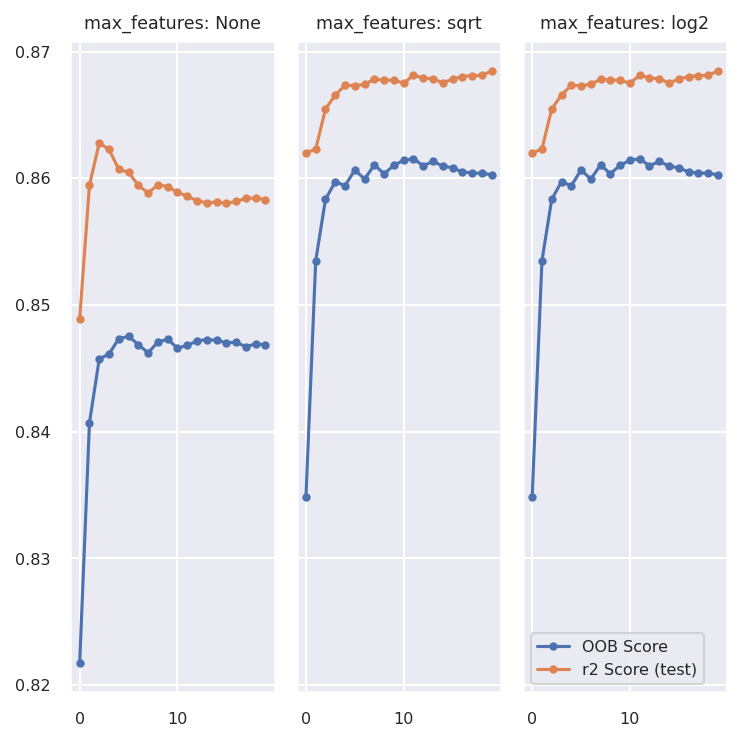

time: 1.03 s (started: 2021-10-28 22:10:09 +00:00)


In [27]:
plt.figure(figsize = (12, 4));

fig, ax = plt.subplots(1, 3, sharey = True);

ax[0].plot(tmp_oob_none, ".-", label = "OOB Score");
ax[0].plot(tmp_test_r2score_none, ".-", label = "r2 Score (test)");
ax[0].set_title("max_features: None");

ax[1].plot(tmp_oob_sqrt, ".-", label = "OOB Score");
ax[1].plot(tmp_test_r2score_sqrt, ".-", label = "r2 Score (test)");
ax[1].set_title("max_features: sqrt");

ax[2].plot(tmp_oob_log2, ".-", label = "OOB Score");
ax[2].plot(tmp_test_r2score_log2, ".-", label = "r2 Score (test)");
ax[2].set_title("max_features: log2");

plt.tight_layout()
plt.legend();

Comentarios:

* Respecto a los gráficos, se quiso mostrar los scores directamente (<code>OOB Score</code> y <code>r2 Score</code>) para facilitar el entendimiento de los resultados.
* Se observa una mejora clara cuando <code>max_features</code> tiene un método aplicado, ya sea <code>sqrt</code> o <code>log2</code>. No es conveniente aplicar todos los atributos para la generación de los árboles. Se observa poca diferencia entre aplicar <code>sqrt</code> o <code>log2</code>.
* A medida que sube la cantidad de estimadores (o árboles) del algoritmo, las métricas tienden a estabilizarse.

###**Ejercicio 5**

Comentarios:

* Se crea un segundo <code>Random Forest</code> con los mejores hiperparámetros encontrados, y se comparará con el desempeño del primero.

In [22]:
model_rf2 = RandomForestRegressor(max_features = "log2",
                                  n_estimators = 970,
                                  oob_score = True,
                                  random_state = 3748).fit(X_train_jl, y_train_jl)

time: 5.66 s (started: 2021-10-28 22:01:46 +00:00)


In [23]:
yhat_rf2 = model_rf2.predict(X_test_jl)

time: 258 ms (started: 2021-10-28 22:01:51 +00:00)


In [24]:
model_rf2_mse = mean_squared_error(y_test_jl, yhat_rf2)
model_rf2_mae = median_absolute_error(y_test_jl, yhat_rf2)
model_rf2_r2_score = r2_score(y_test_jl, yhat_rf2)
model_rf2_oob_score = model_rf2.oob_score_

time: 5.49 ms (started: 2021-10-28 22:01:52 +00:00)


In [25]:
print(f"Modelo Random Forest (1), Error Cuadrático Medio: {model_rf2_mse.round(4)}",
      f"\nModelo Random Forest (1), Mediana del Error Absoluto: {model_rf2_mae.round(4)}",
      f"\nModelo Random Forest (1), Puntaje R2: {model_rf2_r2_score.round(4)}",
      f"\nModelo Random Forest (1), OOB Score: {model_rf2_oob_score.round(4)}")

Modelo Random Forest (1), Error Cuadrático Medio: 879530485.524 
Modelo Random Forest (1), Mediana del Error Absoluto: 12107.6557 
Modelo Random Forest (1), Puntaje R2: 0.8685 
Modelo Random Forest (1), OOB Score: 0.8603
time: 4.76 ms (started: 2021-10-28 22:01:52 +00:00)


In [26]:
np.sqrt(model_rf2_mse)

29656.87922765979

time: 4.55 ms (started: 2021-10-28 22:01:52 +00:00)


Comentarios:

Si se comparan los modelos <code>Random Forest</code> 1 y 2:

* En relación a la raíz de <code>MSE</code> de cada modelo, este bajó en el segundo en un 3% en relación al del primero. El error se sigue ajustando a la baja.
* Respecto a la Mediana del Error Absoluto <code>MAE</code>, este también baja pero solo un 0,6%, pudiendo considerarse esto una mejora marginal al modelo 1 en este aspecto.
* Respecto al <code>r2 Score</code> este solo sube un 0,8% entre los modelos 1 y 2, y podría considerarse como una situación equivalente a lo ocurrido en el punto anterior.
* En el caso del <code>OOB Score</code>, este sube un 1,7% respecto al del modelo 1, lo que representa una mejora también de baja magnitud.
* En general, se observa que un ajuste en los hiperparámetros en el presente caso no representó una mejora importante en el desempeño del modelo. Se considera que:

  * Los hiperparámetros a mejorar que pudieron tener un mayor impacto eran otros (como por ejemplo <code>max_leaf_nodes</code> o <code>min_impurity_decrease</code>).
  * En el caso del presente dataset el modelo en su forma estándar ya tenía una buena capacidad predictiva.